In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
from matplotlib.ticker import FuncFormatter
import math
from matplotlib import font_manager
for file in font_manager.findSystemFonts([r'C:\Users\crino\Downloads\Lato']):
    font_manager.fontManager.addfont(path=file)
plt.rcParams['font.family'] = 'Lato'

In [26]:
def thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w):
    α_s = 1 - r_s * (1 - α_m)
    α_i = 1 - r_i * (1 - α_m)
    ψ_w = 1 - w * (1 - ψ)
    γ_p = 1 - p * (1 - γ)
    
    if α == 2:
        mean_a = ((1 - α) / (1 - eps**(1 - α))) * (-np.log(eps))
    else:
        mean_a = (1 - α) * (1 - eps**(2 - α)) / ((2 - α) * (1 - eps**(1 - α)))
    
    if α == 3:
        mean_a2 = ((1 - α) / (1 - eps**(1 - α))) * (-np.log(eps))
    else:
        mean_a2 = (1 - α) * (1 - eps**(3 - α)) / ((3 - α) * (1 - eps**(1 - α)))
    
    λ_t = 2 * mu * ((m * (1 - v * f) * α_s * α_i) * (mean_a * (ψ_w + γ_p) + np.sqrt(mean_a**2 * (ψ_w - γ_p)**2 + 4 * ψ_w * γ_p * mean_a2)))**(-1)
    return λ_t, mean_a

def act_thresh(eps, α, u):
    if u == 0:
        return eps
    elif u == 1:
        return 1
    
    α1 = 1 - α
    x = (u * (1 - np.power(eps, α1)) + np.power(eps, α1)) ** (1 / α1)
    return x

def ab_vax_thresh(mu, eps, α, m, v, f, f_u, f_d):
    t_f = act_thresh(eps, α, 1-f)
    n_rev_f = ((t_f**(1-α) - eps**(1-α))) / (1 - eps**(1-α))
    mean_a = (1 - α)*(1 - eps**(2-α)) / ((2-α) * (1 - eps**(1-α)))
    mean_a2 = (1 - α)*(1 - eps**(3-α)) / ((3-α) * (1 - eps**(1-α)))
    mean_a_f = (1 - α)*(t_f**(2-α) - eps**(2-α)) / ((2-α) * (1 - eps**(1-α)))
    mean2_a_f = (1 - α)*(t_f**(3-α) - eps**(3-α)) / ((3-α) * (1 - eps**(1-α)))

    v_rev_n = (1 - v * f_u) + v * (f_u - f_d) * n_rev_f
    v_rev_a = (1 - v * f_u) * mean_a + v * (f_u - f_d) * mean_a_f
    v_rev_a2 = (1 - v * f_u) * mean_a2 + v * (f_u - f_d) * mean2_a_f

    λ_t = mu * (m * (v_rev_a + np.sqrt(v_rev_n * v_rev_a2)))**(-1)
    return λ_t, mean_a

In [27]:
α = 2.1
eps = 0.001
v = 0.99
f_u = 1
f_d = 0
t_f=0
mean_a2 = (1 - α)*(1 - eps**(3-α)) / ((3-α) * (1 - eps**(1-α)))
#print(mean_a2)
mean2_a_f = (1 - α)*(t_f**(3-α) - eps**(3-α)) / ((3-α) * (1 - eps**(1-α)))
#print(mean2_a_f)
t_f = act_thresh(eps, α, 0.99)
#print(t_f)
n_rev_f = ((t_f**(1-α) - eps**(1-α))) / (1 - eps**(1-α))
#print(n_rev_f)
ef = np.linspace(0.001, 0.99
                 , 100)
vi = np.linspace(0.001, 0.9, 100)
for effi in ef:
    for v in vi:
        t_f = act_thresh(eps, α, effi)
        mean2_a_f = (1 - α)*(t_f**(3-α) - eps**(3-α)) / ((3-α) * (1 - eps**(1-α)))
        n_rev_f = ((t_f**(1-α) - eps**(1-α))) / (1 - eps**(1-α))
        v_rev_n = (1 - v * f_u) + v * (f_u - f_d) * n_rev_f
        v_rev_a2 = (1 - v * f_u) * mean_a2 + v * (f_u - f_d) * mean2_a_f
        value = np.sqrt(v_rev_n * v_rev_a2)
        print(value)
        if math.isnan(value):
            print(t_f)
            print(mean_a2)
            print(mean2_a_f)
            print(n_rev_f)
            print(v_rev_n)
            print(v_rev_a2)
            print(v)
            print(effi)


0.02470676895725598
0.024482299535026356
0.024257830112272834
0.024033360688980734
0.023808891265134823
0.023584421840719284
0.023359952415717707
0.023135482990113018
0.02291101356388751
0.022686544137022736
0.02246207470949954
0.022237605281297985
0.022013135852397316
0.021788666422775924
0.021564196992411307
0.02133972756128001
0.021115258129357575
0.020890788696618517
0.020666319263036206
0.020441849828582877
0.020217380393229508
0.019992910956945796
0.019768441519700038
0.019543972081459093
0.019319502642188263
0.01909503320185124
0.018870563760409968
0.018646094317824567
0.018421624874053216
0.018197155429052026
0.01797268598277492
0.01774821653517348
0.01752374708619682
0.017299277635791407
0.017074808183900888
0.016850338730465913
0.01662586927542393
0.01640139981870896
0.016176930360251352
0.015952460899977546
0.01572799143780979
0.0155035219736658
0.01527905250745849
0.015054583039095563
0.014830113568479136
0.014605644095505306
0.014381174620063684
0.014156705142036891
0.0139

0.007515242275895835
0.007298442055040963
0.007081478321856637
0.006864335571766353
0.00664699626052736
0.006429440454648364
0.006211645406736413
0.005993585036098734
0.005775229288748644
0.005556543342497212
0.005337486611059217
0.005118011484568901
0.004898061720301034
0.004677570363162261
0.0044564570249858715
0.004234624275601599
0.0040119527816562355
0.0037882946447868166
0.0035634640921381783
0.003337224173314147
0.024708006477485854
0.02449477183804444
0.024281531874934113
0.024068286446655106
0.02385503540664437
0.023641778603046882
0.023428515878474433
0.023215247069751074
0.023001972007644422
0.022788690516581757
0.02257540241435008
0.022362107511778886
0.022148805612404614
0.021935496512115443
0.021722179998775116
0.02150885585182431
0.021295523841857993
0.021082183730177048
0.02086883526831231
0.02065547819751902
0.02044211224823956
0.020228737139532025
0.020015352578462188
0.019801958259456007
0.019588553863609665
0.01937513905795389
0.01916171349466895
0.01894827681024636

0.012841845895077897
0.012637907915145213
0.012433784407705735
0.01222946608277637
0.012024943009806912
0.011820204560636236
0.011615239346148764
0.011410035145792245
0.011204578828985996
0.010998856267292677
0.010792852236041251
0.010586550303868257
0.010379932708380174
0.010172980215822856
0.0099656719622613
0.009757985273309957
0.009549895458889695
0.009341375578798083
0.00913239617403141
0.008922924957748832
0.008712926458465352
0.00850236160642967
0.008291187252089301
0.008079355602941495
0.007866813561742217
0.007653501944763293
0.00743935455322805
0.0072242970637723235
0.00700824569414337
0.006791105587471297
0.006572768841039809
0.0063531120816619335
0.0061319934567340365
0.005909248863565853
0.0056846871731463635
0.005458084107850517
0.005229174289222066
0.004997640754656835
0.004763100904348752
0.004525087301286466
0.00428302086037125
0.02470961593693973
0.0245109842345353
0.024312324755227016
0.0241136368124973
0.023914919696913887
0.023716172675161316
0.023517394989022732
0

0.015373849056157126
0.01517988974063961
0.014985704702158091
0.014791285050610895
0.014596621411217134
0.014401703890242099
0.014206522037707232
0.014011064806764081
0.013815320509371457
0.013619276767868808
0.013422920461985816
0.0132262376707671
0.013029213608820561
0.01283183255621604
0.012634077781266496
0.012435931455313371
0.012237374558509196
0.012038386775439586
0.011838946379249468
0.011639030102729542
0.011438612994571482
0.01123766825870695
0.011036167074295068
0.010834078393504193
0.010631368713729624
0.010428001820280752
0.010223938494832756
0.010019136184038146
0.009813548621590288
0.009607125395671993
0.0093998114520372
0.009191546520872784
0.008982264452949617
0.00877189244723799
0.00856035014791652
0.008347548583254413
0.008133388911793537
0.00791776093204475
0.007700541299764398
0.007481591380687337
0.007260754644774043
0.007037853478261356
0.006812685248650347
0.006585017400031333
0.00635458127385965
0.006121064230940146
0.00588409947386488
0.005643252702406111
0.00

0.016642960611325936
0.01646167361169038
0.016280006011765
0.01609794492616961
0.015915476851369542
0.01573258762647054
0.015549262390874771
0.015365485538490981
0.015181240668156301
0.014996510529886426
0.014811276966524881
0.014625520850309262
0.014439222013812092
0.014252359174644909
0.014064909853234695
0.013876850282890435
0.013688155311271807
0.013498798292249767
0.013308750967006492
0.01311798333305663
0.012926463499678143
0.012734157528013991
0.012541029253838933
0.012347040090670183
0.01215214881052705
0.011956311299199917
0.011759480282357787
0.011561605018186354
0.011362630951480674
0.011162499323186794
0.010961146728255631
0.010758504613288825
0.01055449870375515
0.010349048348451448
0.010142065766263133
0.009933455176998176
0.009723111793930043
0.00951092065042578
0.009296755226299868
0.009080475830834897
0.008861927688072377
0.008640938655057988
0.008417316483887915
0.008190845511727801
0.007961282626666137
0.007728352307181983
0.0074917404629230465
0.007251086704851637
0

0.02423908235767597
0.02408037884662171
0.023921484195210868
0.02376239456908519
0.023603106025740013
0.023443614510523524
0.023283915852450644
0.023124005759821223
0.02296387981563126
0.022803533472765522
0.022642962048958777
0.022482160721512216
0.022321124521750575
0.022159848329204597
0.02199832686550226
0.021836554687950982
0.021674526182792062
0.021512235558106746
0.021349676836352235
0.02118684384650407
0.0210237302157797
0.020860329360916106
0.020696634478972128
0.020532638537624104
0.020368334264920733
0.02020371413846055
0.020038770373952255
0.019873494913115092
0.019707879410872837
0.01954191522179105
0.019375593385703084
0.01920890461246561
0.019041839265779265
0.018874387346004443
0.018706538471895903
0.018538281861173095
0.018369606309835446
0.018200500170123417
0.018030951327016768
0.017860947173151318
0.01769047458202367
0.01751951987934082
0.017348068812357183
0.01717610651702564
0.017003617482771446
0.016830585514677733
0.0166569936928492
0.01648282432869517
0.0163080

0.017903358904450842
0.017740489537105
0.017576910758209427
0.017412602574553807
0.017247544140196615
0.017081713706419404
0.01691508856788802
0.01674764500466524
0.01657935821967951
0.016410202271209016
0.01624014999988935
0.016069172949694448
0.015897241282274443
0.015724323683958017
0.015550387264640347
0.01537539744767814
0.015199317849799037
0.015022110149900545
0.01484373394546142
0.014664146595111345
0.014483303045699237
0.014301155641960526
0.01411765391660283
0.013932744358299849
0.01374637015469446
0.013558470907052398
0.013368982312662064
0.013177835810425371
0.012984958184305439
0.012790271118360454
0.012593690695961352
0.012395126834417422
0.012194482644557721
0.011991653702759989
0.011786527220381262
0.011578981092394655
0.011368882803101216
0.01115608816183529
0.010940439835308532
0.010721765635227405
0.010499876509504964
0.010274564171989886
0.010045598288066053
0.009812723110198629
0.009575653426321893
0.00933406964169474
0.009087611756801556
0.008835871923023875
0.008

0.023149596076918487
0.02301624772214893
0.02288245014139366
0.022748195408045048
0.022613475379848886
0.022478281690793366
0.02234260574260476
0.02220643869582624
0.022069771460454614
0.021932594686108156
0.021794898751696396
0.02165667375456095
0.021517909499053932
0.02137859548451807
0.021238720892629858
0.02109827457406416
0.020957245034435395
0.020815620419466878
0.020673388499336053
0.02053053665213914
0.02038705184641398
0.02024292062265496
0.020098129073748174
0.019952662824249005
0.019806507008417452
0.019659646246919238
0.01951206462209256
0.01936374565167135
0.019214672260845896
0.019064826752530822
0.018914190775698114
0.01876274529161943
0.018610470537846834
0.018457345989744505
0.018303350319365155
0.018148461351444267
0.017992656016261818
0.017835910299095283
0.01767819918595835
0.017519496605286882
0.017359775365196783
0.01719900708589662
0.017037162126790534
0.01687420950775366
0.01671011682400147
0.016544850153905423
0.016378373959028598
0.016210650975564882
0.0160416

0.022257052454596197
0.02213370575769851
0.022009734260233886
0.021885127344382933
0.021759874094066104
0.021633963283119628
0.02150738336286249
0.021380122449015763
0.02125216830793246
0.0211235083420931
0.020994129574818582
0.020864018634148003
0.02073316173582517
0.020601544665332802
0.020469152758908392
0.02033597088347048
0.02020198341537777
0.020067174217937238
0.019931526617569934
0.019795023378535323
0.019657646676106182
0.019519378068076458
0.019380198464473666
0.019240088095335683
0.01909902647639862
0.018956992372527886
0.01881396375870839
0.01866991777839186
0.018524830698979124
0.018378677864192883
0.018231433643071386
0.01808307137528534
0.017933563312449094
0.017782880555061477
0.01763099298467203
0.01747786919082336
0.01732347639226947
0.017167780351912427
0.01701074528483424
0.01685233375872664
0.016692506585936465
0.016531222706247538
0.016368439059408914
0.0162041104462917
0.016038189377409896
0.015870625907370973
0.015701367453625593
0.015530358597657647
0.015357540

In [28]:
lam_a, minta = ab_vax_thresh(0.01, 0.001, 2.1, 2, 0, 1, 1, 1)
print(lam_a)

lam_b, mintba = ab_vax_thresh(0.01, 0.001, 2.1, 2, 1, 0.1, 0, 0)
print(lam_b)

0.1654468827603741
0.1654468827603741


In [29]:
import random

random_number = random.randint(76,76)
print(random_number)

76


In [30]:
#ab_vax_thresh(mu, eps, α, m, v, f, f_u, f_d)
lam_t, mina = ab_vax_thresh(0.01, 0.001, 2.1, 2, 0, 1, 0, 0)
lam = 3 * lam_t

ef = np.linspace(0.001, 0.99, 100)
vi = np.linspace(0.001, 0.99, 100)
iErri = np.zeros((len(ef), len(vi)))

for i, effi  in enumerate(ef):
    for j, vis in enumerate(vi):
        iErri[j, i] = lam / ab_vax_thresh(0.01, 0.001, 2.1, 2, vis, effi, 1, 0)[0]
print(iErri)
iErri_n = np.copy(iErri)
iErri_n[iErri_n<1] = np.nan

[[2.99921271 2.99867077 2.9985779  ... 2.99703988 2.99702658 2.99701329]
 [2.99133586 2.98536365 2.9843417  ... 2.96746855 2.96732242 2.96717638]
 [2.98343729 2.97200459 2.97005111 ... 2.93789716 2.93761823 2.93733947]
 ...
 [2.08762971 1.15368841 0.9850726  ... 0.12265428 0.11278222 0.10200344]
 [2.07584074 1.11587409 0.93833363 ... 0.09107141 0.0819689  0.07180522]
 [2.06397217 1.07624367 0.88811313 ... 0.0574627  0.04987546 0.04109776]]


In [31]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = ab_vax_thresh(0.01, 0.001, 2.1, 2, 0, 1, 0, 0)
lam = 1.2 * lam_t

ef = np.linspace(0.01, 0.99, 100)
vi = np.linspace(0.01, 0.99, 100)
iErri2 = np.zeros((len(ef), len(vi)))

for i, effi  in enumerate(ef):
    for j, vis in enumerate(vi):
        iErri2[j, i] = lam / ab_vax_thresh(0.01, 0.001, 2.1, 2, vis, effi, 1, 0)[0]
print(iErri2)
iErri2_n = np.copy(iErri2)
iErri2_n[iErri2_n<1] = np.nan

[[1.19473156 1.19433148 1.19410489 ... 1.18815854 1.18810584 1.18805317]
 [1.18949609 1.18869883 1.18824776 ... 1.17643667 1.17633181 1.17622701]
 [1.18424018 1.18304457 1.18236885 ... 1.16471478 1.16455777 1.16440085]
 ...
 [0.47228074 0.39871071 0.36247733 ... 0.04876618 0.04485326 0.04058229]
 [0.4577914  0.38045866 0.34204359 ... 0.03624795 0.03263912 0.02861162]
 [0.44265753 0.360903   0.31973745 ... 0.0229329  0.01992075 0.0164391 ]]


In [32]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 3 * lam_t

ef = np.linspace(0.01, 1, 100)
vi = np.linspace(0.01, 1, 100)
rErri = np.zeros((len(ef), len(vi)))

for i, effi  in enumerate(ef):
    for j, vis in enumerate(vi):
        rErri[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, vis, effi, 1, 0, 0, 0, 0, 0, 0)[0]
print(rErri)

[[2.9997 2.9994 2.9991 ... 2.9706 2.9703 2.97  ]
 [2.9994 2.9988 2.9982 ... 2.9412 2.9406 2.94  ]
 [2.9991 2.9982 2.9973 ... 2.9118 2.9109 2.91  ]
 ...
 [2.9706 2.9412 2.9118 ... 0.1188 0.0894 0.06  ]
 [2.9703 2.9406 2.9109 ... 0.0894 0.0597 0.03  ]
 [2.97   2.94   2.91   ... 0.06   0.03   0.    ]]


C:\Users\crino\AppData\Local\Temp/ipykernel_18384/864961368.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  λ_t = 2 * mu * ((m * (1 - v * f) * α_s * α_i) * (mean_a * (ψ_w + γ_p) + np.sqrt(mean_a**2 * (ψ_w - γ_p)**2 + 4 * ψ_w * γ_p * mean_a2)))**(-1)


In [36]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 1.2 * lam_t

ef = np.linspace(0.01, 1, 100)
vi = np.linspace(0.01, 1, 100)
rErri2 = np.zeros((len(ef), len(vi)))

for i, effi  in enumerate(ef):
    for j, vis in enumerate(vi):
        rErri2[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, vis, effi, 1, 0, 0, 0, 0, 0, 0)[0]
print(rErri2)

[[1.19988 1.19976 1.19964 ... 1.18824 1.18812 1.188  ]
 [1.19976 1.19952 1.19928 ... 1.17648 1.17624 1.176  ]
 [1.19964 1.19928 1.19892 ... 1.16472 1.16436 1.164  ]
 ...
 [1.18824 1.17648 1.16472 ... 0.04752 0.03576 0.024  ]
 [1.18812 1.17624 1.16436 ... 0.03576 0.02388 0.012  ]
 [1.188   1.176   1.164   ... 0.024   0.012   0.     ]]


C:\Users\crino\AppData\Local\Temp/ipykernel_18384/864961368.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  λ_t = 2 * mu * ((m * (1 - v * f) * α_s * α_i) * (mean_a * (ψ_w + γ_p) + np.sqrt(mean_a**2 * (ψ_w - γ_p)**2 + 4 * ψ_w * γ_p * mean_a2)))**(-1)


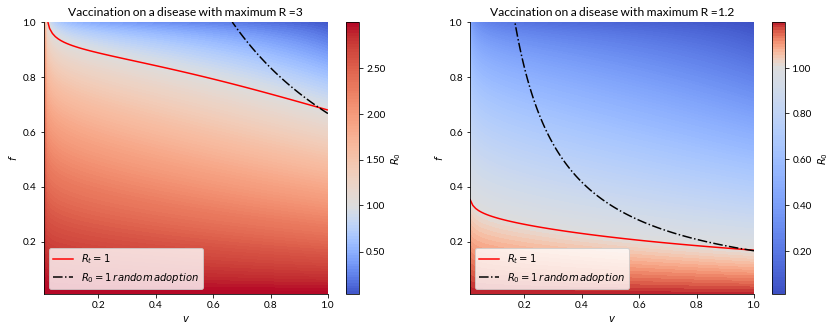

In [37]:
def two_significant_digits(x, pos):
    return "{:.2f}".format(x)

fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(iErri.min(), iErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax[0].contourf(ef, vi, iErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


# Plot contour lines
contour = ax[0].contour(ef, vi, iErri, colors="red", levels=[1])
contour2 = ax[0].contour(ef, vi, rErri, colors="black", linestyles="-.", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_t = 1\,$")
ax[0].plot(0, 0, color="black",linestyle="-.", label=r"$R_0 = 1\,random\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$v$")
ax[0].set_ylabel(r"$f$")
ax[0].set_title("Vaccination on a disease with maximum R =3")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(ef.min(), vi.max())  # Set x-axis limits
ax[0].set_ylim(ef.min(), vi.max())  # Set y-axis limits


contour_levels2 = np.linspace(iErri2.min(), iErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(ef, vi, iErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour = ax[1].contour(ef, vi, iErri2, colors="red", levels=[1])
contour2 = ax[1].contour(ef, vi, rErri2, colors="black", linestyles="-.", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.2))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.2))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_t = 1\,$")
ax[1].plot(0, 0, color="black",linestyle="-.", label=r"$R_0 = 1\,random\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$v$")
ax[1].set_ylabel(r"$f$")
ax[1].set_title("Vaccination on a disease with maximum R =1.2")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(ef.min(), vi.max())  # Set x-axis limits
ax[1].set_ylim(ef.min(), vi.max())  # Set y-axis limits

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_rvax_phase_space.png"
# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
for axs in ax:
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)

# Show the plot
plt.show()

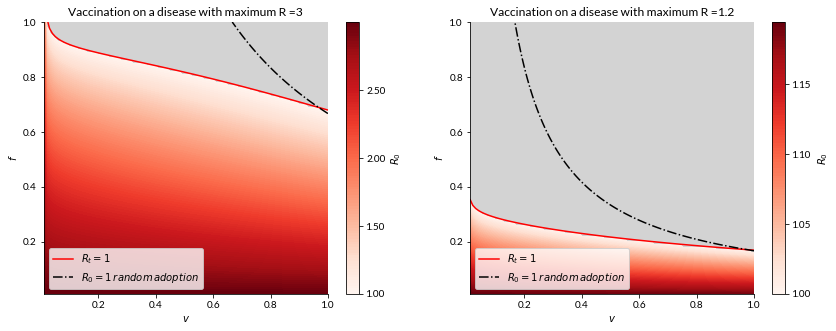

In [38]:
def two_significant_digits(x, pos):
    return "{:.2f}".format(x)
fig, ax = plt.subplots(1,2, figsize=(14, 5))

contour_levels = np.linspace(1, np.nanmax(iErri_n), 100)
ax[0].set_facecolor("lightgrey")
vmax= np.nanmax(iErri_n)
plot_surface = ax[0].contourf(ef, vi, iErri_n, cmap="Reds", levels = contour_levels)

# Plot contour lines
contour = ax[0].contour(ef, vi, iErri, colors="red", levels=[1])
contour2 = ax[0].contour(ef, vi, rErri, colors="black", linestyles="-.", levels=[1])







# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(1, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(1, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_t = 1\,$")
ax[0].plot(0, 0, color="black",linestyle="-.", label=r"$R_0 = 1\,random\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$v$")
ax[0].set_ylabel(r"$f$")
ax[0].set_title("Vaccination on a disease with maximum R =3")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(ef.min(), vi.max())  # Set x-axis limits
ax[0].set_ylim(ef.min(), vi.max())  # Set y-axis limits


contour_levels2 = np.linspace(1, np.nanmax(iErri2_n), 100)
ax[1].set_facecolor("lightgrey")
vmax2= np.nanmax(iErri2_n)

plot_surface = ax[1].contourf(ef, vi, iErri2_n, cmap="Reds", levels = contour_levels2)

# Plot contour lines
contour = ax[1].contour(ef, vi, iErri2, colors="red", levels=[1])
contour2 = ax[1].contour(ef, vi, rErri2, colors="black", linestyles="-.", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.05))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.05))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_t = 1\,$")
ax[1].plot(0, 0, color="black",linestyle="-.", label=r"$R_0 = 1\,random\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$v$")
ax[1].set_ylabel(r"$f$")
ax[1].set_title("Vaccination on a disease with maximum R =1.2")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(ef.min(), vi.max())  # Set x-axis limits
ax[1].set_ylim(ef.min(), vi.max())  # Set y-axis limits

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_rvax_phase_space.png"
# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
for axs in ax:
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)

# Show the plot
plt.show()

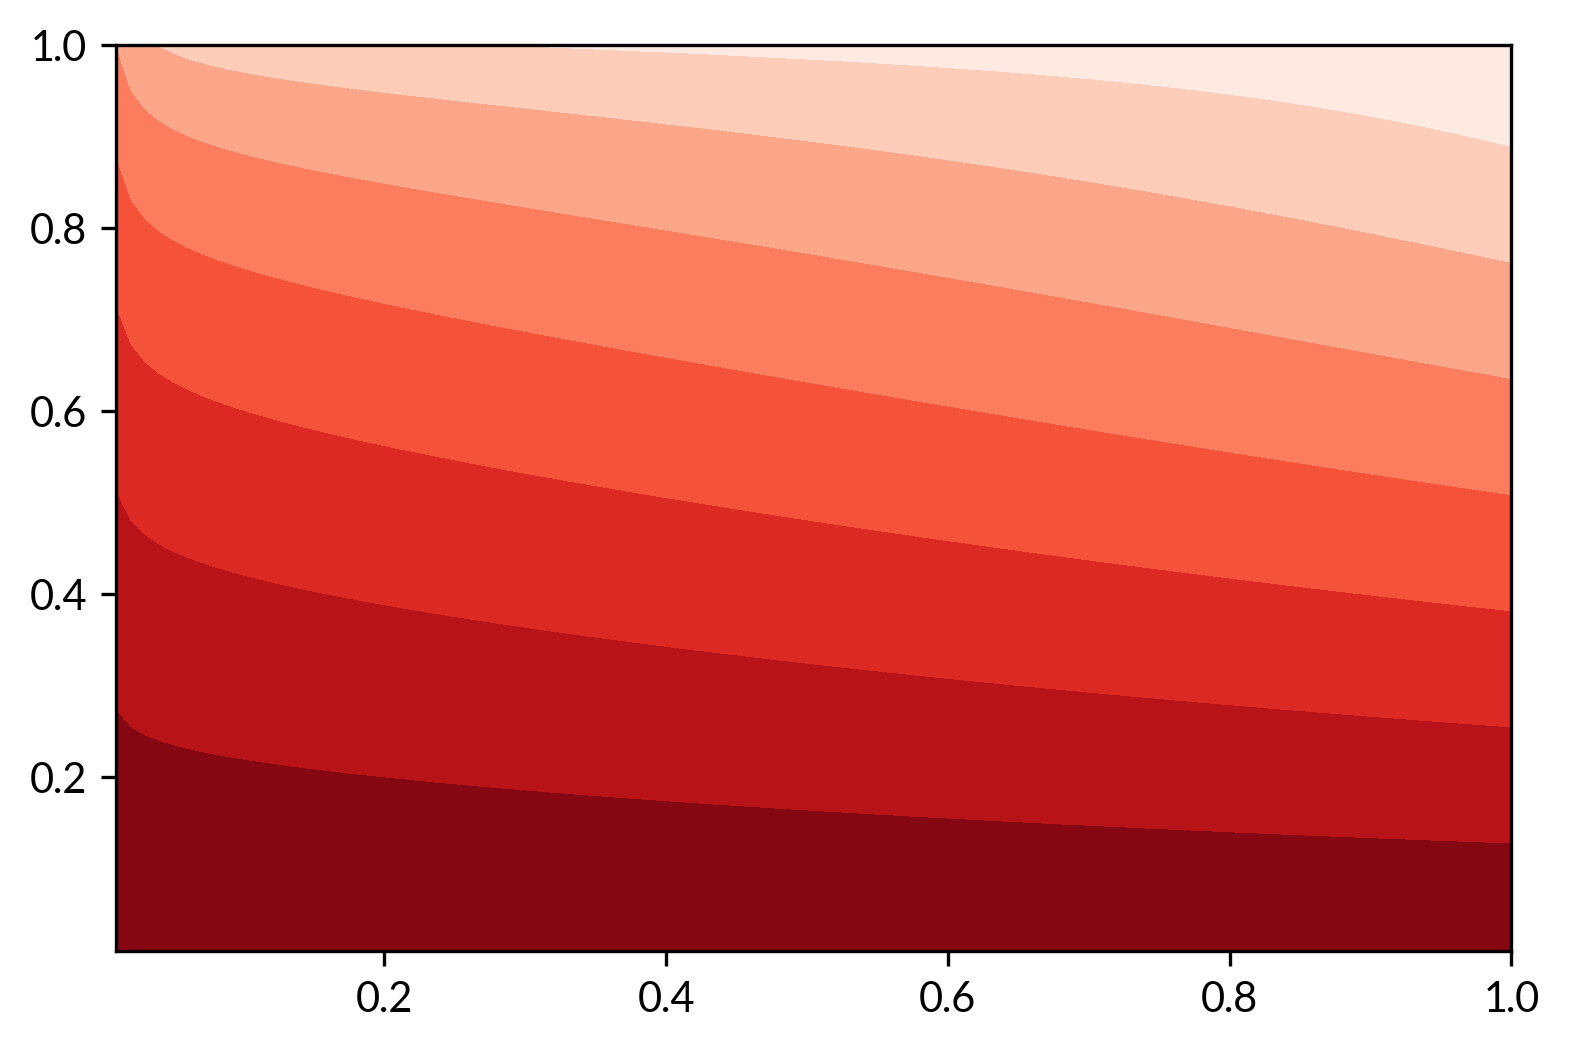

In [35]:
fig, ax = plt.subplots(dpi=300)
ax.contourf(ef, vi, iErri2, cmap="Reds", origin= "upper")
iErri2_copy = iErri2.copy()

ax.set_facecolor("lightgrey")
